In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats
from statsmodels.formula.api import ols, logit

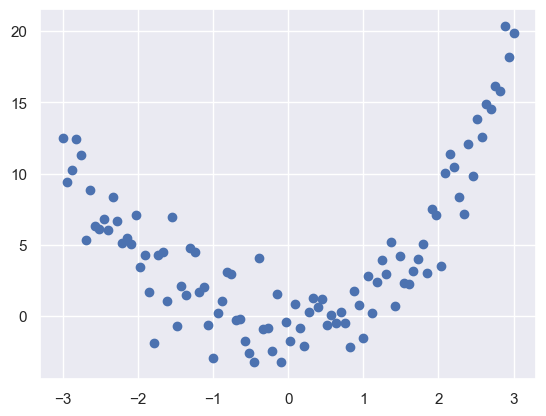

In [11]:
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = np.piecewise(x, [x < 0, x >= 0], [lambda x: x**2, lambda x: np.exp(x) - 1])
y += np.random.normal(scale=2, size=x.shape)  # Add some noise

plt.scatter(x, y)

Text(0.5, 1.0, 'Polynomial Regression Fit (degree 3)')

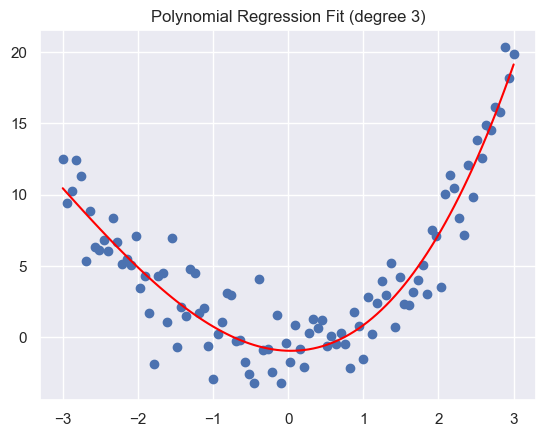

In [13]:
# Fit a polynomial regression model with degree 3
data = pd.DataFrame({'x': x, 'y': y})
model = ols('y ~ np.power(x, 3) + np.power(x, 2) + x', data=data).fit()
preds = model.predict(data)
plt.scatter(x, y)
plt.plot(x, preds, color='red', label='Polynomial Fit (degree 3)')
plt.title('Polynomial Regression Fit (degree 3)')

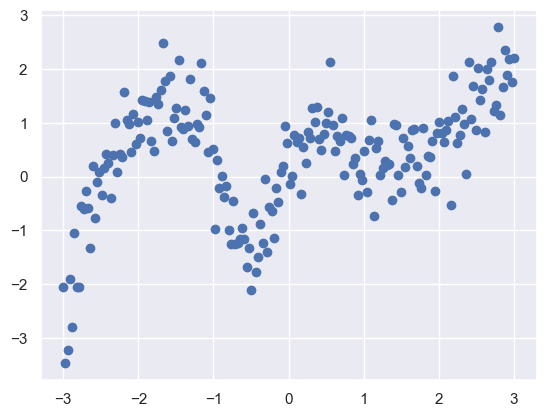

In [14]:
x = np.linspace(-3, 3, 200)
y = np.piecewise(x, 
                 [x < -1, (x >= -1) & (x < 1), x >= 1], 
                 [lambda x: 0.5*x**3 + x**2 - 0.5*x, lambda x: np.sin(3*x), lambda x: np.exp(x) / 10])
y += np.random.normal(scale=0.5, size=x.shape)

plt.scatter(x, y)

Text(0.5, 1.0, 'Polynomial Regression Fit (degree 3)')

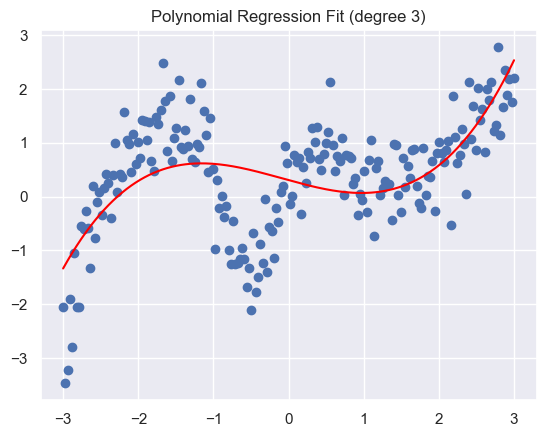

In [18]:
# Fit a polynomial regression model with degree 3
data = pd.DataFrame({'x': x, 'y': y})
model = ols('y ~ np.power(x, 3) + np.power(x, 2) + x', data=data).fit()
preds = model.predict(data)
plt.scatter(x, y)
plt.plot(x, preds, color='red', label='Polynomial Fit (degree 3)')
plt.title('Polynomial Regression Fit (degree 3)')

In [29]:
spline_basis

,Intercept,"bs(x, df=10, degree=3, include_intercept=False)[0]","bs(x, df=10, degree=3, include_intercept=False)[1]","bs(x, df=10, degree=3, include_intercept=False)[2]","bs(x, df=10, degree=3, include_intercept=False)[3]","bs(x, df=10, degree=3, include_intercept=False)[4]","bs(x, df=10, degree=3, include_intercept=False)[5]","bs(x, df=10, degree=3, include_intercept=False)[6]","bs(x, df=10, degree=3, include_intercept=False)[7]","bs(x, df=10, degree=3, include_intercept=False)[8]","bs(x, df=10, degree=3, include_intercept=False)[9]"
0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,0.113444,0.002365,0.000011,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1.0,0.213025,0.009220,0.000087,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,1.0,0.299426,0.020210,0.000292,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,1.0,0.373328,0.034975,0.000693,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000693,0.034975,0.373328,0.591004
196,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000292,0.020210,0.299426,0.680072
197,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000087,0.009220,0.213025,0.777668
198,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000011,0.002365,0.113444,0.884180


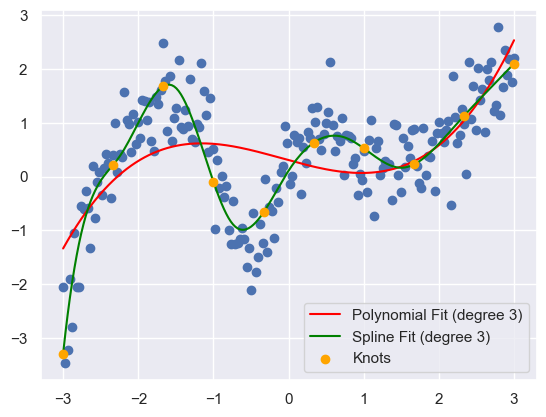

In [27]:
# Fit a spline regression model
from patsy import dmatrix
from statsmodels.regression.linear_model import OLS

model = ols('y ~ np.power(x, 3) + np.power(x, 2) + x', data=data).fit()
preds = model.predict(data)
plt.scatter(x, y)
plt.plot(x, preds, color='red', label='Polynomial Fit (degree 3)')

spline_basis = dmatrix("bs(x, df=10, degree=3, include_intercept=False)", {"x": x}, return_type='dataframe')
spline_model = OLS(y, spline_basis).fit()
x_pred = np.linspace(-3, 3, 200)
spline_basis_pred = dmatrix("bs(x_pred, df=10, degree=3, include_intercept=False)", {"x_pred": x_pred}, return_type='dataframe')
preds_spline = spline_model.predict(spline_basis_pred)
plt.plot(x, preds_spline, color='green', label='Spline Fit (degree 3)')

# Add markers for the knots
knots = np.linspace(-3, 3, 10)
plt.scatter(knots, spline_model.predict(dmatrix("bs(knots, df=10, degree=3, include_intercept=False)", {"knots": knots}, return_type='dataframe')), color='orange', label='Knots', zorder=5)
# plt.title('Spline Regression Fit (degree 3)')

plt.legend()

In [38]:
data = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125-2025/mse-125-2025-public/refs/heads/main/data/ames_housing.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
data = data[data["1stFlrSF"] < 4000]

Text(0, 0.5, 'SalePrice')

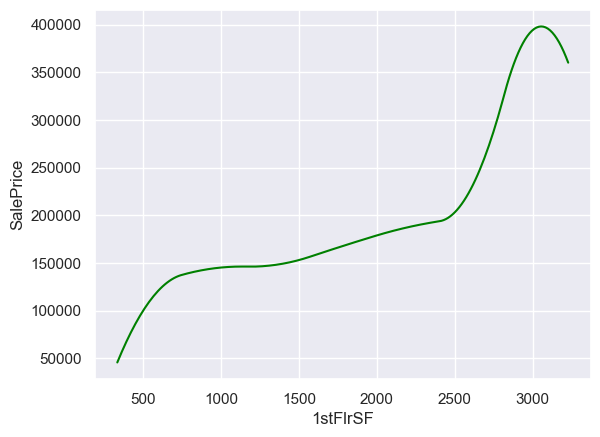

In [44]:
# Fit additive model to 1stFlrSF to predict SalePrice
spline_basis = dmatrix("bs(x, df=8, degree=2, include_intercept=False)", {"x": data["1stFlrSF"]}, return_type='dataframe')
spline_model = OLS(data["SalePrice"], spline_basis).fit()
x_pred = np.linspace(data["1stFlrSF"].min(), data["1stFlrSF"].max(), 200)
spline_basis_pred = dmatrix("bs(x_pred, df=8, degree=2, include_intercept=False)", {"x_pred": x_pred}, return_type='dataframe')
preds_spline = spline_model.predict(spline_basis_pred)

# plt.scatter(data["1stFlrSF"], data["SalePrice"], alpha=0.5, label='Data Points')
plt.plot(x_pred, preds_spline, color='green', label='Spline Fit (degree 3)')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
